In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.18.0


In [3]:
from tensorflow import keras

In [4]:
mnist=tf.keras.datasets.mnist

In [5]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [51]:
x_train=x_train/255
x_test=x_test/255

In [53]:
x_train.shape

(60000, 28, 28)

In [55]:
x_test.shape

(10000, 28, 28)

In [61]:
#define the network architecture using keras
model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation="relu"),
    Dense(64,activation="relu"),
    Dense(10,activation="softmax")
])
model.summary()

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
#Compile model with sgd optimizer
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=['accuracy'])
#Train the model
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7104 - loss: 1.0668 - val_accuracy: 0.9129 - val_loss: 0.3121
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9126 - loss: 0.3049 - val_accuracy: 0.9297 - val_loss: 0.2467
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9304 - loss: 0.2470 - val_accuracy: 0.9393 - val_loss: 0.2077
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9394 - loss: 0.2058 - val_accuracy: 0.9459 - val_loss: 0.1816
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9496 - loss: 0.1809 - val_accuracy: 0.9520 - val_loss: 0.1632
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9552 - loss: 0.1597 - val_accuracy: 0.9558 - val_loss: 0.1488
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9576 - loss: 0.1458 - val_accuracy: 0.9578 - val_loss: 0.1415
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9632 - loss: 0.1274 - 

In [89]:
#Evalute the network on the test data
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Profit=%.3f" %test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9570 - loss: 0.1399
Loss=0.120
Profit=0.963


In [75]:
predicted_value=model.predict(x_test)
print()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


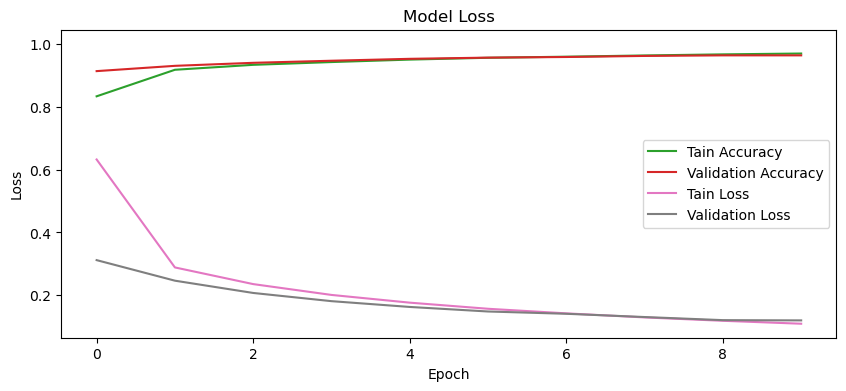

In [87]:
plt.figure(figsize=(10,4))

#Accuracy
plt.plot(1,1,1)
plt.plot(history.history['accuracy'],label='Tain Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#Loss
plt.plot(1,1,1)
plt.plot(history.history['loss'],label='Tain Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.show()